
## Understanding p-values

The p-value is a probability that measures the evidence against the null hypothesis. It quantifies how extreme the observed data are, assuming the null hypothesis is true. Here's a detailed explanation:

1. **Null Hypothesis (<i>H<sub>0</sub></i>)**: This is the default assumption that there is no effect or no difference. For instance, in a one-sample t-test, the null hypothesis could be that the sample mean is equal to the population mean (&mu; = &mu;<sub>0</sub>).

2. **Alternative Hypothesis (<i>H<sub>a</sub></i>)**: This is what you want to prove. It states that there is an effect or a difference. In the same one-sample t-test, the alternative hypothesis could be that the sample mean is not equal to the population mean (&mu; &ne; &mu;<sub>0</sub>).

3. **p-value**: The p-value tells us the probability of obtaining test results at least as extreme as the observed data, under the assumption that the null hypothesis is true. A smaller p-value indicates stronger evidence against the null hypothesis.

4. **Significance Level (&alpha;)**: This is the threshold chosen by the researcher (commonly 0.05) to decide whether to reject the null hypothesis.


### Decision Rule

- <b>p-value < &alpha;</b>: Reject the null hypothesis (<i>H<sub>0</sub></i>). This means there is significant evidence to support the alternative hypothesis (<i>H<sub>a</sub></i>).
- **p-value &ge; &alpha;**: Fail to reject the null hypothesis (<i>H<sub>0</sub></i>). This means there is not enough evidence to support the alternative hypothesis (<i>H<sub>a</sub></i>).

## t-Test and z-Test

### t-Test

The t-test is used when the sample size is small, and/or the population standard deviation is unknown. There are different types of t-tests:

1. **One-Sample t-Test**: Tests if the sample mean is significantly different from a known population mean.
2. **Two-Sample t-Test (Independent t-Test)**: Tests if the means of two independent samples are significantly different from each other.
3. **Paired t-Test**: Tests if the means of two related samples are significantly different. The samples are paired or matched.

The t-statistic is calculated as:

<div align="center">
<img src="https://latex.codecogs.com/png.image?\dpi{150} \bg{white} t = \frac{\bar{x} - \mu}{s / \sqrt{n}}" title="t = \frac{\bar{x} - \mu}{s / \sqrt{n}}" />
</div>
where:

-  <i>&#x0304;x</i> is the sample mean
- &mu; is the population mean
- s is the sample standard deviation
- n is the sample size

The t-statistic follows a t-distribution with <i>n-1</i> degrees of freedom.



### z-Test

The z-test is used for large samples (typically <i>n > 30</i>), and/or when the population standard deviation is known. It tests if the sample mean is significantly different from a known population mean.

The z-statistic is calculated as:

<div align="center">
<img src="https://latex.codecogs.com/png.image?\dpi{150} \bg{white} z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}}" title="z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}}" />
</div>

where:
- <i>&#x0304;x</i> is the sample mean
- &mu; is the population mean
- &sigma; is the population standard deviation
- n is the sample size

The z-statistic follows a standard normal distribution (mean 0, standard deviation 1).

## Visualization and Interpretation

### Interpretation of Results

- **One-Sample t-Test**: If the p-value is less than 0.05, we reject the null hypothesis and conclude that the sample mean is significantly different from the hypothesized population mean.
- **Two-Sample t-Test**: If the p-value is less than 0.05, we reject the null hypothesis and conclude that the means of the two independent samples are significantly different.
- **Paired t-Test**: If the p-value is less than 0.05, we reject the null hypothesis and conclude that the means of the paired samples are significantly different.
- **Z-Test**: If the p-value is less than 0.05, we reject the null hypothesis and conclude that the sample mean is significantly different from the hypothesized population mean, assuming the population standard deviation is known.

In all cases, the visualizations help to see the distribution of the data and the hypothesized mean, making it easier to understand the results of the tests.

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up seaborn for better visuals
sns.set(style="whitegrid")


In [2]:
# Generating sample data
np.random.seed(0)
data1 = np.random.normal(50, 10, 30)  # Sample 1
data2 = np.random.normal(55, 10, 30)  # Sample 2
data3 = data1 + np.random.normal(0, 5, 30)  # Paired sample to data1


One-sample t-test:
 t-statistic = 2.20, p-value = 0.0356


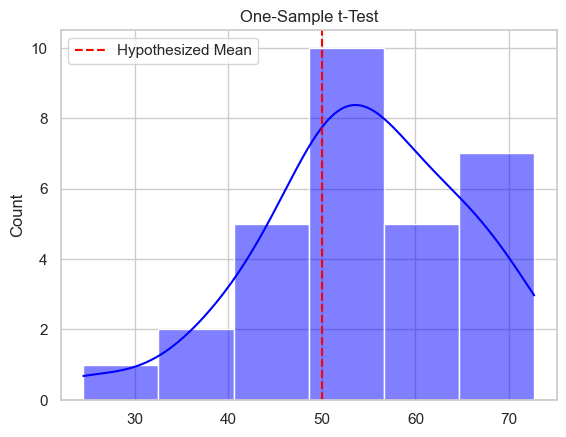

In [3]:
# One-sample t-test
mu = 50  # Hypothesized population mean
t_stat, p_val = stats.ttest_1samp(data1, mu)

print(f"One-sample t-test:\n t-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")

# Visualization
sns.histplot(data1, kde=True, color='blue')
plt.axvline(mu, color='red', linestyle='--', label='Hypothesized Mean')
plt.title('One-Sample t-Test')
plt.legend()
plt.show()


Two-sample t-test:
 t-statistic = 0.89, p-value = 0.3773


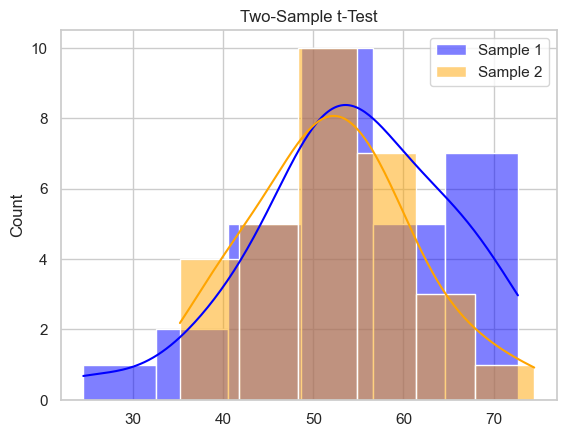

In [4]:
# Two-sample t-test
t_stat, p_val = stats.ttest_ind(data1, data2)

print(f"Two-sample t-test:\n t-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")

# Visualization
sns.histplot(data1, kde=True, color='blue', label='Sample 1')
sns.histplot(data2, kde=True, color='orange', label='Sample 2')
plt.title('Two-Sample t-Test')
plt.legend()
plt.show()


Paired t-test:
 t-statistic = 0.76, p-value = 0.4540


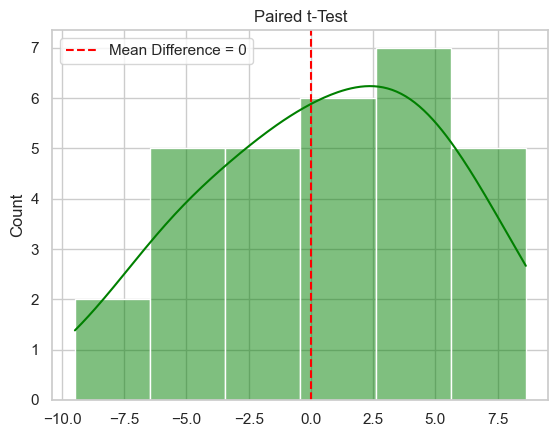

In [5]:
# Paired t-test
t_stat, p_val = stats.ttest_rel(data1, data3)

print(f"Paired t-test:\n t-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")

# Visualization
sns.histplot(data1 - data3, kde=True, color='green')
plt.axvline(0, color='red', linestyle='--', label='Mean Difference = 0')
plt.title('Paired t-Test')
plt.legend()
plt.show()


Z-test:
 z-statistic = 2.43, p-value = 0.0153


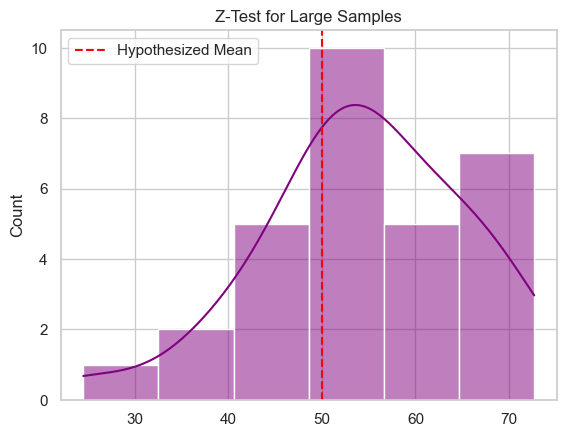

In [6]:
# Z-test
def z_test(sample, mu, sigma):
    n = len(sample)
    sample_mean = np.mean(sample)
    z_stat = (sample_mean - mu) / (sigma / np.sqrt(n))
    p_val = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    return z_stat, p_val

# Assuming we know the population standard deviation
sigma = 10
z_stat, p_val = z_test(data1, mu, sigma)

print(f"Z-test:\n z-statistic = {z_stat:.2f}, p-value = {p_val:.4f}")

# Visualization
sns.histplot(data1, kde=True, color='purple')
plt.axvline(mu, color='red', linestyle='--', label='Hypothesized Mean')
plt.title('Z-Test for Large Samples')
plt.legend()
plt.show()



## Conclusion

Understanding and correctly interpreting p-values, t-tests, and z-tests is fundamental in statistical analysis. The p-value provides a measure of the strength of the evidence against the null hypothesis. By performing the appropriate t-test or z-test based on the sample size and known parameters, researchers can make informed decisions about their data.

- **One-sample t-test**: Suitable for comparing the sample mean to a known population mean when the population standard deviation is unknown and the sample size is small.
- **Two-sample t-test**: Used for comparing the means of two independent samples.
- **Paired t-test**: Appropriate for comparing means from the same group at different times or under different conditions.
- **z-test**: Ideal for large sample sizes or when the population standard deviation is known.

By adhering to these guidelines and using visualizations to supplement the analysis, researchers can effectively interpret the results of their hypothesis tests and draw meaningful conclusions from their data.